In [2]:
import os
import pandas as pd
import re

from util2.tools import tfidf_cos_similarity, embd_cos_similarity
from sentence_transformers import SentenceTransformer

In [38]:
total_data = pd.read_csv('./NA_hotel_2.csv')

In [39]:
path = './Data/Hotel_data/Hotel_Review_Excel'
files = os.listdir(path)
model = SentenceTransformer('all-mpnet-base-v2')

for file in files:
    data = pd.read_excel(path + f'/{file}')
    try:
        reviews = data['user_review'].tolist()
        response = data[data['response'] != 'No Exist'].response.tolist()
        
        idx = file.split('_')[1].split('.')[0]
        idx_num = int(idx)
        
        num_of_review = total_data.loc[idx_num, 'num_review']
        num_no_answer = len(data[data['response'] == 'No Exist'])
        num_answer = (num_of_review - num_no_answer)
        
        no_response_ratio = (num_no_answer / num_of_review)
        response_ratio = (num_answer / num_of_review)
        
        total_data.loc[idx_num, "num_response"] = num_answer
        total_data.loc[idx_num, "num_not_response"] = num_no_answer
        total_data.loc[idx_num, "response_ratio"] = response_ratio
        total_data.loc[idx_num, "not_response_ratio"] = no_response_ratio
        
        if len(reviews) > 3:
            total_data.loc[idx_num, "TF-IDF_review_avg_similarity"] = tfidf_cos_similarity(reviews)
            total_data.loc[idx_num, "Embedding_review_avg_similarity"] = embd_cos_similarity(reviews, model=model)
        else:
            total_data.loc[idx_num, "TF-IDF_review_avg_similarity"] = -1
            total_data.loc[idx_num, "Embedding_review_avg_similarity"] = -1
             
        if len(response) > 3:
            total_data.loc[idx_num, "TF-IDF_answer_avg_similarity"] = tfidf_cos_similarity(response)
            total_data.loc[idx_num, "Embedding_answer_avg_similarity"] = embd_cos_similarity(response, model=model)
        else:
            total_data.loc[idx_num, "TF-IDF_answer_avg_similarity"] = -1
            total_data.loc[idx_num, "Embedding_answer_avg_similarity"] = -1

        print(f'Done. index = {idx}')
        total_data.to_excel('./NA_hotel_4.xlsx', index=False)
    except:
        print(f'Error Occur, file = {file}')

total_data.to_excel('./NA_hotel_4.xlsx', index=False)


Done. index = 227
Done. index = 320
Done. index = 459
Done. index = 241
Done. index = 573
Done. index = 450
Done. index = 510
Done. index = 156
Done. index = 477
Done. index = 31
Done. index = 118
Done. index = 213
Done. index = 173
Done. index = 563
Done. index = 493
Done. index = 202
Done. index = 63
Done. index = 482
Done. index = 440
Done. index = 669
Done. index = 412
Done. index = 644
Done. index = 562
Done. index = 204
Done. index = 386
Done. index = 307
Done. index = 21
Done. index = 674
Done. index = 605
Done. index = 219
Done. index = 537
Done. index = 415
Done. index = 265
Done. index = 81
Done. index = 400
Done. index = 346
Done. index = 134
Done. index = 417
Done. index = 231
Done. index = 335
Done. index = 507
Done. index = 339
Done. index = 268
Done. index = 206
Done. index = 474
Done. index = 641
Done. index = 373
Done. index = 259
Done. index = 47
Done. index = 443
Done. index = 77
Done. index = 684
Done. index = 45
Done. index = 402
Done. index = 321
Done. index = 628

In [28]:
total_data[total_data.response_ratio != 0].response_ratio

0      0.991525
1      0.059783
3      0.963783
4      0.992410
5      1.000000
         ...   
690    0.974863
691    1.000000
693    0.716895
694    0.321429
695    0.909548
Name: response_ratio, Length: 580, dtype: float64

In [32]:
total_data[total_data.Embedding_answer_avg_similarity != -1].Embedding_answer_avg_similarity.min()

0.3653396736844761

In [29]:
value1 = total_data[total_data.Embedding_answer_avg_similarity != -1].Embedding_answer_avg_similarity.to_list()
value2 = total_data[total_data.Embedding_answer_avg_similarity != -1].response_ratio.to_list()

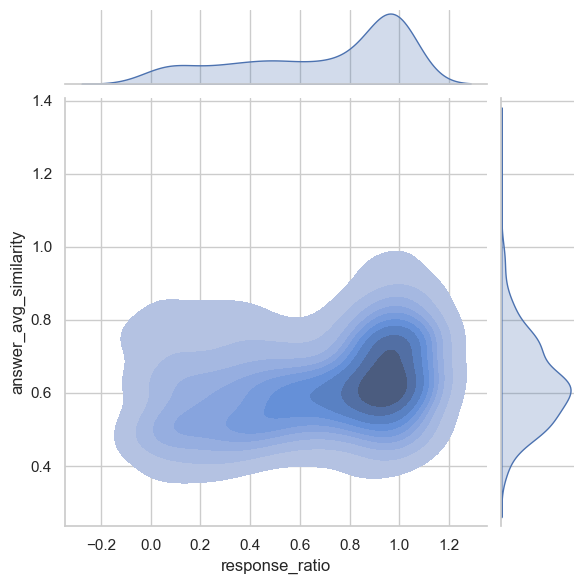

In [35]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'response_ratio': value2,  # 실제 데이터로 변경해주세요.
    'answer_avg_similarity': value1   # 실제 데이터로 변경해주세요.
}
df = pd.DataFrame(data)

# Jointplot으로 2D 분포 시각화
sns.jointplot(data=df, x='response_ratio', y='answer_avg_similarity', kind='kde', fill=True)
plt.show()

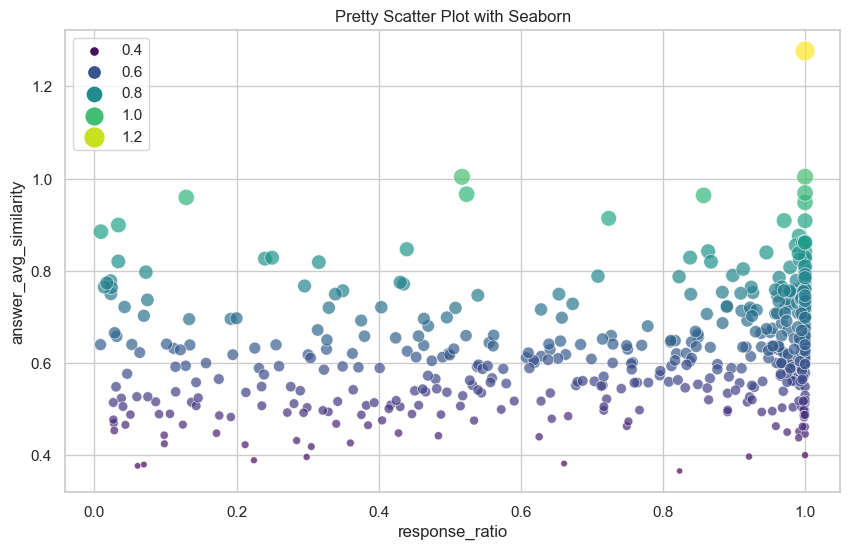

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 설정
sns.set_theme(style="whitegrid")

# 임의의 데이터 생성
x = value2
y = value1

# scatter plot 생성
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, hue=y, palette="viridis", size=y, sizes=(20, 200), edgecolor="w", alpha=0.7)

plt.title("Pretty Scatter Plot with Seaborn")
plt.xlabel("response_ratio")
plt.ylabel("answer_avg_similarity")
plt.show()


In [37]:
total_data

,url,hotel_name,location,num_review,score,num_response,num_not_response,response_ratio,not_response_ratio,TF-IDF_review_avg_similarity,Embedding_review_avg_similarity,TF-IDF_answer_avg_similarity,Embedding_answer_avg_similarity
0,https://www.tripadvisor.com/Hotel_Review-g5571...,SpringHill Suites Dallas Richardson/University...,"18180 Highland Springs Way, Dallas, TX 75252",118.0,5.0,117.0,1.0,0.991525,0.008475,0.132697,0.604926,0.469057,0.875550
1,https://www.tripadvisor.com/Hotel_Review-g4324...,Stone Mill Hotel & Suites,"100 East Beacon Street, Lanesboro, MN 55949",552.0,5.0,33.0,519.0,0.059783,0.940217,0.140518,0.607775,0.222490,0.526544
2,https://www.tripadvisor.com/Hotel_Review-g1798...,Stardust Lodge,"4061 Lake Tahoe Blvd., South Lake Tahoe, CA 96...",2.0,4.5,0.0,2.0,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,https://www.tripadvisor.com/Hotel_Review-g5020...,Courtyard by Marriott Cleveland University Circle,"2021 Cornell Rd, Cleveland, OH 44106-3808",497.0,4.5,479.0,18.0,0.963783,0.036217,0.116119,0.541507,0.186154,0.627582
4,https://www.tripadvisor.com/Hotel_Review-g5773...,The Pine Tavern Lodge,"585 Floyd Hwy N Route 221, Floyd, VA 24091-2636",527.0,5.0,523.0,4.0,0.992410,0.007590,0.128758,0.618243,0.333271,0.741525
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,https://www.tripadvisor.com/Hotel_Review-g6076...,Pestana Park Avenue,"23 E 39th St, New York City, NY 10016-0930",357.0,4.5,357.0,0.0,1.000000,0.000000,0.133488,0.643034,0.498009,0.860802
692,https://www.tripadvisor.com/Hotel_Review-g5083...,Belamere Suites Hotel,"12200 Williams Rd, Perrysburg, OH 43551-6803",3.0,5.0,0.0,3.0,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
693,https://www.tripadvisor.com/Hotel_Review-g5716...,Best Western Plus Settlers Point,"1294 E Hospitality Way, Washington, UT 84780",219.0,5.0,157.0,62.0,0.716895,0.283105,0.122916,0.647516,0.242992,0.504699
694,https://www.tripadvisor.com/Hotel_Review-g3320...,Tallman Hotel,"9550 Main St, Upper Lake, CA 95485-9596",280.0,5.0,90.0,190.0,0.321429,0.678571,0.149959,0.607671,0.194865,0.496784
